# Exploratory Data Analysis & Visualization - AI/ML Market Analysis

This notebook provides comprehensive visual analysis and insights from the AI market datasets using advanced visualizations.

## Objectives:
- Perform detailed correlation analysis
- Identify trends and patterns over time
- Analyze regional patterns and differences
- Conduct statistical tests and hypothesis validation
- Create interactive visualizations for exploration
- Generate business insights and recommendations

## 1. Import Libraries and Load Data

In [1]:
# Import comprehensive visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Statistical analysis
from scipy import stats
from scipy.stats import pearsonr, spearmanr, kendalltau
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Utilities
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Load processed datasets
processed_dir = Path('../data/processed')
results_dir = Path('../results')
market_df = pd.read_csv(results_dir / 'ai_market_engineered.csv')
popularity_df = pd.read_csv(processed_dir / 'ai_popularity_clean.csv')


✅ Data loaded for EDA!
Market data (engineered): (8, 162)
Popularity data: (250, 12)


In [5]:
# Configure plot saving directory
plot_dir = Path('../results/plot')
plot_dir.mkdir(parents=True, exist_ok=True)


✅ Plot directory configured: ..\results\plot
Directory exists: True


## 2. Market Evolution Timeline Analysis

In [2]:
# Create comprehensive market evolution timeline
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        'AI Revenue Growth (2018-2025)',
        'Market Value Explosion', 
        'Adoption Rate Progression',
        'Job Market Transformation',
        'Organizational AI Integration',
        'Technology Impact Metrics'
    ),
    vertical_spacing=0.08,
    horizontal_spacing=0.1
)

# 1. AI Revenue Growth
if 'ai_software_revenue_in_billions' in market_df.columns:
    fig.add_trace(
        go.Scatter(
            x=market_df['year'],
            y=market_df['ai_software_revenue_in_billions'],
            mode='lines+markers',
            name='AI Revenue',
            line=dict(color='#1f77b4', width=3),
            marker=dict(size=8)
        ),
        row=1, col=1
    )

# 2. Market Value
if 'global_ai_market_value_in_billions' in market_df.columns:
    fig.add_trace(
        go.Scatter(
            x=market_df['year'],
            y=market_df['global_ai_market_value_in_billions'],
            mode='lines+markers',
            name='Market Value',
            line=dict(color='#ff7f0e', width=3),
            marker=dict(size=8)
        ),
        row=1, col=2
    )

# 3. Adoption Rate
if 'ai_adoption' in market_df.columns:
    fig.add_trace(
        go.Scatter(
            x=market_df['year'],
            y=market_df['ai_adoption'],
            mode='lines+markers',
            name='Adoption Rate',
            line=dict(color='#2ca02c', width=3),
            marker=dict(size=8)
        ),
        row=2, col=1
    )

# 4. Job Impact
if 'estimated_jobs_eliminated_by_ai_millions' in market_df.columns:
    fig.add_trace(
        go.Scatter(
            x=market_df['year'],
            y=market_df['estimated_jobs_eliminated_by_ai_millions'],
            mode='lines+markers',
            name='Jobs Eliminated',
            line=dict(color='#d62728', width=3)
        ),
        row=2, col=2
    )
    
if 'estimated_new_jobs_created_by_ai_millions' in market_df.columns:
    fig.add_trace(
        go.Scatter(
            x=market_df['year'],
            y=market_df['estimated_new_jobs_created_by_ai_millions'],
            mode='lines+markers',
            name='Jobs Created',
            line=dict(color='#9467bd', width=3)
        ),
        row=2, col=2
    )

# 5. Organizational Metrics
if 'organizations_using_ai' in market_df.columns:
    fig.add_trace(
        go.Scatter(
            x=market_df['year'],
            y=market_df['organizations_using_ai'],
            mode='lines+markers',
            name='Orgs Using AI',
            line=dict(color='#8c564b', width=3)
        ),
        row=3, col=1
    )

# 6. Technology Impact
if 'americans_using_voice_assistants' in market_df.columns:
    fig.add_trace(
        go.Scatter(
            x=market_df['year'],
            y=market_df['americans_using_voice_assistants'],
            mode='lines+markers',
            name='Voice Assistant Usage',
            line=dict(color='#e377c2', width=3)
        ),
        row=3, col=2
    )

fig.update_layout(
    height=900,
    title_text="AI Market Evolution Timeline (2018-2025)",
    title_x=0.5,
    showlegend=False
)

fig.show()

## 3. Advanced Correlation Analysis

In [3]:
# Advanced correlation analysis
def advanced_correlation_analysis(df, method='pearson'):
    """
    Perform comprehensive correlation analysis
    """
    # Select numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Calculate correlation matrix
    if method == 'pearson':
        corr_matrix = numeric_df.corr(method='pearson')
    elif method == 'spearman':
        corr_matrix = numeric_df.corr(method='spearman')
    else:
        corr_matrix = numeric_df.corr(method='kendall')
    
    return corr_matrix

# Calculate different correlation matrices
corr_pearson = advanced_correlation_analysis(market_df, 'pearson')
corr_spearman = advanced_correlation_analysis(market_df, 'spearman')

# Create interactive correlation heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr_pearson.values,
    x=corr_pearson.columns,
    y=corr_pearson.columns,
    colorscale='RdBu',
    zmid=0,
    text=np.round(corr_pearson.values, 2),
    texttemplate="%{text}",
    textfont={"size": 8},
    hoverongaps=False
))

fig.update_layout(
    title='AI Market Data - Correlation Matrix (Pearson)',
    width=1000,
    height=800,
    xaxis_tickangle=-45
)

fig.show()

# Find and display strongest correlations
def find_strong_correlations(corr_matrix, threshold=0.7):
    """
    Find correlations above threshold
    """
    strong_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > threshold and not np.isnan(corr_val):
                strong_corr.append({
                    'Variable_1': corr_matrix.columns[i],
                    'Variable_2': corr_matrix.columns[j],
                    'Correlation': corr_val,
                    'Abs_Correlation': abs(corr_val)
                })
    
    return pd.DataFrame(strong_corr).sort_values('Abs_Correlation', ascending=False)

strong_correlations = find_strong_correlations(corr_pearson, threshold=0.7)

if not strong_correlations.empty:
    for idx, row in strong_correlations.head(10).iterrows():
        var1 = row['Variable_1'][:30] + '...' if len(row['Variable_1']) > 30 else row['Variable_1']
        var2 = row['Variable_2'][:30] + '...' if len(row['Variable_2']) > 30 else row['Variable_2']
else:

🔗 STRONG CORRELATIONS (|r| > 0.7):
   estimated_revenue_increase_fro... ↔ estimated_revenue_increase_fro...: 1.000
   estimated_revenue_increase_fro... ↔ estimated_revenue_increase_fro...: 1.000
   estimated_revenue_increase_fro... ↔ estimated_revenue_increase_fro...: 1.000
   estimated_revenue_increase_fro... ↔ adoption_momentum: -1.000
   estimated_revenue_increase_fro... ↔ estimated_revenue_increase_fro...: 1.000
   estimated_revenue_increase_fro... ↔ organizations_using_ai_diff_la...: 1.000
   estimated_revenue_increase_fro... ↔ adoption_momentum: -1.000
   estimated_revenue_increase_fro... ↔ estimated_revenue_increase_fro...: 1.000
   estimated_new_jobs_created_by_... ↔ estimated_revenue_increase_fro...: 1.000
   estimated_revenue_increase_fro... ↔ estimated_revenue_increase_fro...: 1.000


## 4. Time Series Decomposition and Trend Analysis


📈 Analyzing Ai Software Revenue In Billions...


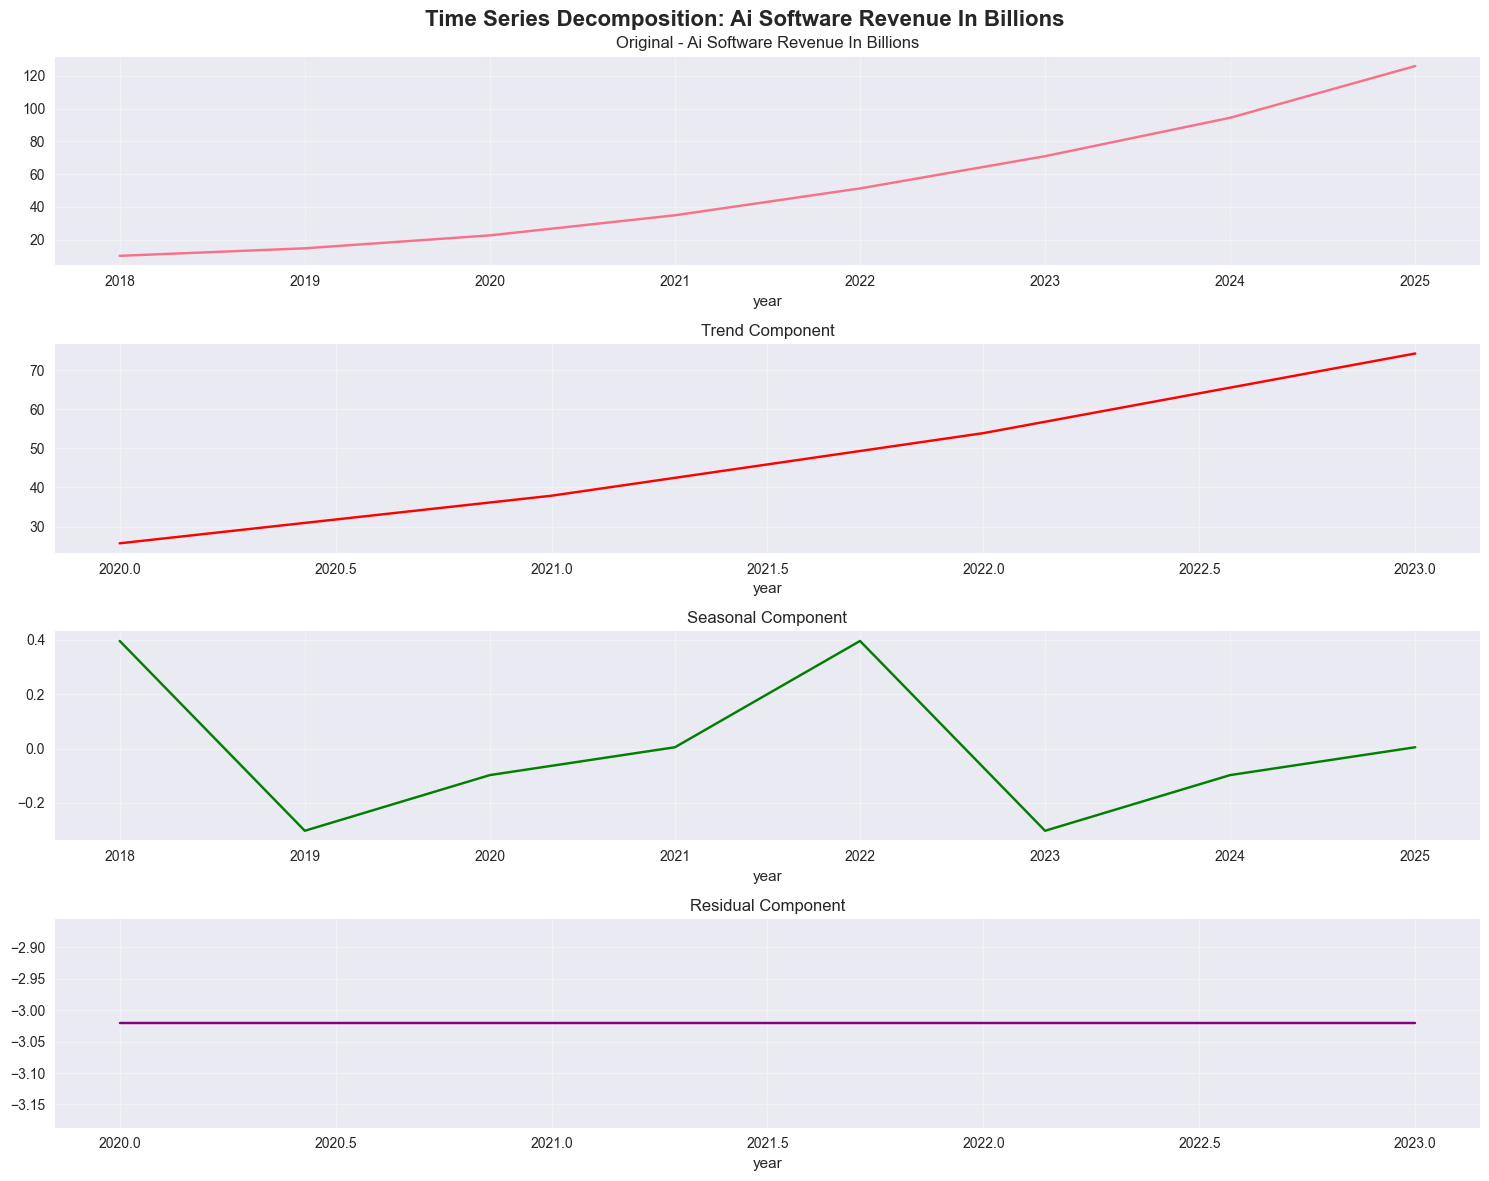


📈 Analyzing Global Ai Market Value In Billions...


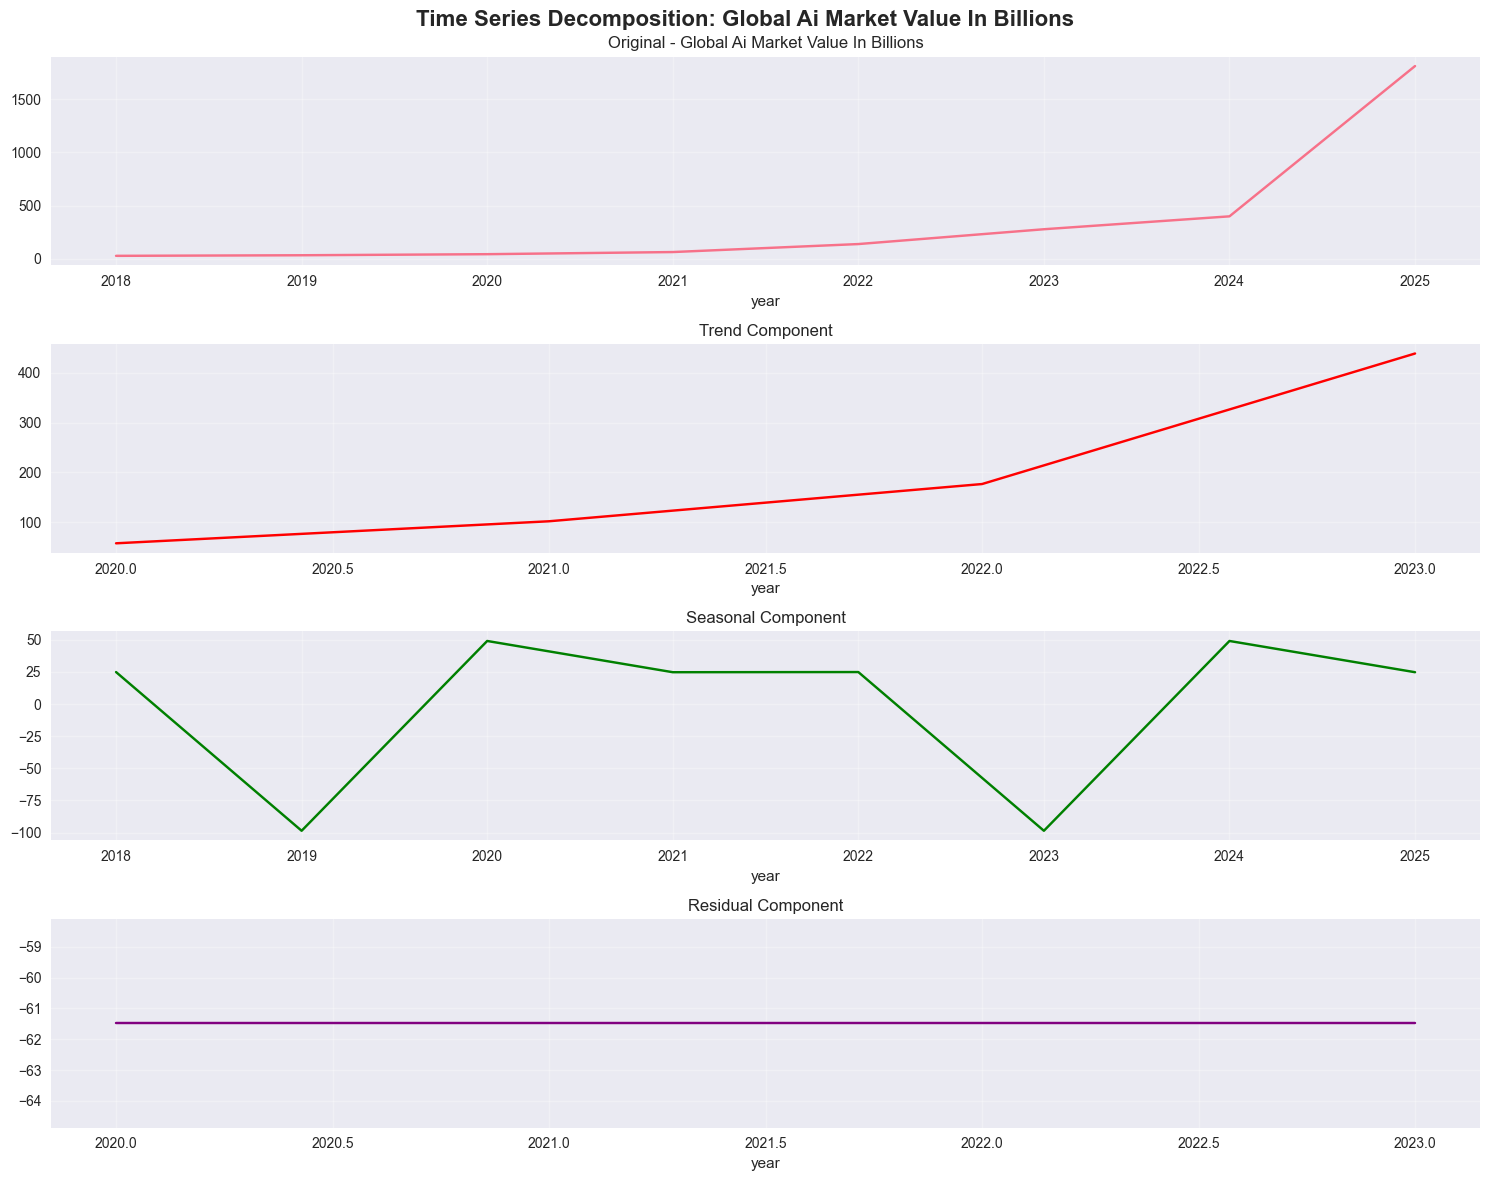

In [4]:
# Time series decomposition for key metrics
def analyze_time_series_components(df, target_col, year_col='year'):
    """
    Decompose time series into trend, seasonal, and residual components
    """
    if target_col not in df.columns or year_col not in df.columns:
        return None
    
    # Create time series
    ts_data = df[[year_col, target_col]].dropna()
    ts_data = ts_data.set_index(year_col)[target_col]
    
    if len(ts_data) < 4:
        return None
    
    # Perform decomposition (use additive for trend analysis)
    try:
        decomposition = seasonal_decompose(ts_data, model='additive', period=min(4, len(ts_data)//2))
        
        # Create visualization
        fig, axes = plt.subplots(4, 1, figsize=(15, 12))
        
        # Original data
        decomposition.observed.plot(ax=axes[0], title=f'Original - {target_col.replace("_", " ").title()}')
        axes[0].grid(True, alpha=0.3)
        
        # Trend
        decomposition.trend.plot(ax=axes[1], title='Trend Component', color='red')
        axes[1].grid(True, alpha=0.3)
        
        # Seasonal
        decomposition.seasonal.plot(ax=axes[2], title='Seasonal Component', color='green')
        axes[2].grid(True, alpha=0.3)
        
        # Residual
        decomposition.resid.plot(ax=axes[3], title='Residual Component', color='purple')
        axes[3].grid(True, alpha=0.3)
        
        plt.suptitle(f'Time Series Decomposition: {target_col.replace("_", " ").title()}', 
                    fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        return decomposition
    
    except Exception as e:
        return None

# Analyze key time series
key_metrics = [
    'ai_software_revenue_in_billions',
    'global_ai_market_value_in_billions',
    'ai_adoption'
]

decompositions = {}
for metric in key_metrics:
    if metric in market_df.columns:
        decomp = analyze_time_series_components(market_df, metric)
        if decomp is not None:
            decompositions[metric] = decomp

## 5. Growth Rate and Momentum Analysis

In [6]:
# Comprehensive growth analysis
growth_cols = [col for col in market_df.columns if 'growth' in col]

if growth_cols:
    # Create growth comparison chart
    fig = go.Figure()
    
    colors = px.colors.qualitative.Set3
    
    for i, col in enumerate(growth_cols[:6]):  # Show top 6 growth metrics
        if not market_df[col].isna().all():
            fig.add_trace(
                go.Scatter(
                    x=market_df['year'],
                    y=market_df[col],
                    mode='lines+markers',
                    name=col.replace('_', ' ').title(),
                    line=dict(color=colors[i % len(colors)], width=2)
                )
            )
    
    fig.update_layout(
        title='Growth Rates Comparison Over Time',
        xaxis_title='Year',
        yaxis_title='Growth Rate (%)',
        height=600,
        hovermode='x unified'
    )
    
    fig.show()
    
    # Growth statistics
    for col in growth_cols[:5]:
        if not market_df[col].isna().all():
            mean_growth = market_df[col].mean()
            std_growth = market_df[col].std()
            max_growth = market_df[col].max()
            min_growth = market_df[col].min()
            
            col_display = col.replace('_', ' ').title()[:40]
else:

📊 GROWTH RATE STATISTICS:
📈 Ai Software Revenue In Billions Yoy Grow:
   Mean: 43.6%, Std: 8.9%
   Range: [33.1%, 54.4%]
📈 Ai Software Revenue In Billions Cumulati:
   Mean: 425.8%, Std: 408.7%
   Range: [0.0%, 1147.5%]
📈 Ai Software Revenue In Billions Rolling :
   Mean: 43.6%, Std: 8.9%
   Range: [33.1%, 54.4%]
📈 Ai Software Revenue In Billions Growth A:
   Mean: -0.0%, Std: 0.1%
   Range: [-0.1%, 0.1%]
📈 Global Ai Market Value In Billions Yoy G:
   Mean: 100.3%, Std: 116.9%
   Range: [18.6%, 352.5%]


## 6. Regional Analysis and Global Patterns

In [7]:
# Analyze global AI popularity patterns
def analyze_regional_patterns(df):
    """
    Analyze regional patterns in AI popularity
    """
    
    # Countries with highest AI interest
    country_col = None
    popularity_col = None
    
    # Find relevant columns
    for col in df.columns:
        if 'country' in col.lower():
            country_col = col
        elif 'popularity' in col.lower() and df[col].dtype in ['int64', 'float64']:
            popularity_col = col
            break
    
    if country_col and popularity_col:
        # Clean data for analysis
        regional_data = df[[country_col, popularity_col]].dropna()
        regional_data = regional_data[regional_data[country_col] != '']
        
        if len(regional_data) > 0:
            # Top countries by AI popularity
            top_countries = regional_data.nlargest(15, popularity_col)
            
            # Create bar chart
            fig = px.bar(
                top_countries,
                x=popularity_col,
                y=country_col,
                orientation='h',
                title='Top 15 Countries by AI Popularity',
                labels={popularity_col: 'AI Popularity Score', country_col: 'Country'},
                color=popularity_col,
                color_continuous_scale='viridis'
            )
            
            fig.update_layout(height=600, yaxis={'categoryorder': 'total ascending'})
            fig.show()
            
            for i, (idx, row) in enumerate(top_countries.head(10).iterrows(), 1):
                country = row[country_col]
                score = row[popularity_col]
            
            return regional_data
    
    return None

# Perform regional analysis
regional_data = analyze_regional_patterns(popularity_df)

🌍 REGIONAL AI POPULARITY ANALYSIS



🏆 TOP 10 COUNTRIES BY AI POPULARITY:
 1. Vietnam: 100.0
 2. China: 72.0
 3. Romania: 63.0
 4. Italy: 54.0
 5. Myanmar (Burma): 51.0
 6. Philippines: 44.0
 7. South Korea: 39.0
 8. Singapore: 35.0
 9. Pakistan: 33.0
10. Nepal: 32.0


## 7. Statistical Hypothesis Testing

In [8]:
# Statistical hypothesis testing
def perform_hypothesis_tests(df):
    """
    Perform various statistical tests on the data
    """
    
    results = {}
    
    # Test 1: Is there a significant trend in AI revenue?
    if 'ai_software_revenue_in_billions' in df.columns and 'year' in df.columns:
        revenue_data = df[['year', 'ai_software_revenue_in_billions']].dropna()
        if len(revenue_data) > 3:
            slope, intercept, r_value, p_value, std_err = stats.linregress(
                revenue_data['year'], revenue_data['ai_software_revenue_in_billions']
            )
            
            
            results['revenue_trend'] = {
                'slope': slope,
                'r_squared': r_value**2,
                'p_value': p_value,
                'significant': p_value < 0.05
            }
    
    # Test 2: Correlation between adoption and revenue
    if 'ai_adoption' in df.columns and 'ai_software_revenue_in_billions' in df.columns:
        adoption_revenue = df[['ai_adoption', 'ai_software_revenue_in_billions']].dropna()
        if len(adoption_revenue) > 3:
            corr_coef, p_value = pearsonr(
                adoption_revenue['ai_adoption'], 
                adoption_revenue['ai_software_revenue_in_billions']
            )
            
            
            results['adoption_revenue_corr'] = {
                'correlation': corr_coef,
                'p_value': p_value,
                'significant': p_value < 0.05
            }
    
    # Test 3: Job creation vs elimination balance
    if 'estimated_new_jobs_created_by_ai_millions' in df.columns and 'estimated_jobs_eliminated_by_ai_millions' in df.columns:
        jobs_data = df[['estimated_new_jobs_created_by_ai_millions', 'estimated_jobs_eliminated_by_ai_millions']].dropna()
        if len(jobs_data) > 3:
            # Paired t-test
            t_stat, p_value = stats.ttest_rel(
                jobs_data['estimated_new_jobs_created_by_ai_millions'],
                jobs_data['estimated_jobs_eliminated_by_ai_millions']
            )
            
            
            results['job_balance_test'] = {
                't_statistic': t_stat,
                'p_value': p_value,
                'jobs_creation_higher': t_stat > 0 and p_value < 0.05
            }
    
    return results

# Perform hypothesis tests
test_results = perform_hypothesis_tests(market_df)


🧪 STATISTICAL HYPOTHESIS TESTING
📈 AI Revenue Trend Test:
   Slope: 16.33 billion/year
   R²: 0.938
   P-value: 0.000075
   Significant trend: Yes

👥 Job Creation vs Elimination Test:
   T-statistic: -9.934
   P-value: 0.000022
   Job creation > elimination: Inconclusive

📋 Statistical tests completed: 2 tests


## 8. Interactive Visualization Dashboard

In [9]:
# Create interactive dashboard-style visualization
def create_interactive_dashboard(df):
    """
    Create comprehensive interactive dashboard
    """
    # Key metrics cards (simulated)
    if 'year' in df.columns:
        latest_year = df['year'].max()
        latest_data = df[df['year'] == latest_year].iloc[0]
        
        
        # Key metrics display
        metrics = {
            'AI Software Revenue': ('ai_software_revenue_in_billions', 'B'),
            'Market Value': ('global_ai_market_value_in_billions', 'B'),
            'Adoption Rate': ('ai_adoption', '%'),
            'Organizations Using AI': ('organizations_using_ai', '%'),
            'Expected Revenue Increase': ('estimated_revenue_increase_from_ai_trillions_usd', 'T')
        }
        
        for metric_name, (col_name, unit) in metrics.items():
            if col_name in df.columns:
                value = latest_data[col_name]
                if not pd.isna(value):
                    if unit == 'T':
                    elif unit == 'B':
                    else:
    
    # Create multi-metric comparison
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Revenue vs Market Value', 'Adoption Trends', 
                       'Job Market Impact', 'Growth Momentum'),
        specs=[[{"secondary_y": True}, {"secondary_y": False}],
               [{"secondary_y": False}, {"secondary_y": False}]]
    )
    
    # Plot 1: Revenue vs Market Value (dual axis)
    if 'ai_software_revenue_in_billions' in df.columns:
        fig.add_trace(
            go.Scatter(x=df['year'], y=df['ai_software_revenue_in_billions'],
                      mode='lines+markers', name='Software Revenue',
                      line=dict(color='blue', width=3)),
            row=1, col=1
        )
    
    if 'global_ai_market_value_in_billions' in df.columns:
        fig.add_trace(
            go.Scatter(x=df['year'], y=df['global_ai_market_value_in_billions'],
                      mode='lines+markers', name='Market Value',
                      line=dict(color='red', width=3)),
            row=1, col=1, secondary_y=True
        )
    
    # Plot 2: Adoption trends
    adoption_cols = [col for col in df.columns if 'adoption' in col.lower() and df[col].dtype in ['int64', 'float64']]
    for i, col in enumerate(adoption_cols[:3]):
        fig.add_trace(
            go.Scatter(x=df['year'], y=df[col],
                      mode='lines+markers', name=col.replace('_', ' ').title()),
            row=1, col=2
        )
    
    # Plot 3: Job impact
    if 'net_job_impact' in df.columns:
        fig.add_trace(
            go.Bar(x=df['year'], y=df['net_job_impact'],
                  name='Net Job Impact',
                  marker_color=['red' if x < 0 else 'green' for x in df['net_job_impact']]),
            row=2, col=1
        )
    
    # Plot 4: Growth momentum
    if 'ai_software_revenue_in_billions_yoy_growth' in df.columns:
        fig.add_trace(
            go.Scatter(x=df['year'], y=df['ai_software_revenue_in_billions_yoy_growth'],
                      mode='lines+markers', name='Revenue Growth Rate',
                      line=dict(color='purple', width=3)),
            row=2, col=2
        )
    
    fig.update_layout(height=800, title_text="AI Market Interactive Dashboard")
    fig.show()

# Create the dashboard
create_interactive_dashboard(market_df)

📊 AI MARKET DASHBOARD - 2025
💰 AI Software Revenue: $126.0B
💰 Market Value: $1810.0B
📊 Organizations Using AI: 55.0%
💰 Expected Revenue Increase: $5.5T


## 9. Market Anomaly Detection

In [10]:
# Detect anomalies in market data
def detect_market_anomalies(df, target_cols):
    """
    Detect anomalies using statistical methods
    """
    anomalies = {}
    
    for col in target_cols:
        if col in df.columns:
            data = df[col].dropna()
            if len(data) > 3:
                # Z-score method
                z_scores = np.abs(stats.zscore(data))
                z_anomalies = np.where(z_scores > 2)[0]  # 2 standard deviations
                
                # IQR method
                Q1 = data.quantile(0.25)
                Q3 = data.quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                iqr_anomalies = np.where((data < lower_bound) | (data > upper_bound))[0]
                
                anomalies[col] = {
                    'z_score_anomalies': z_anomalies.tolist(),
                    'iqr_anomalies': iqr_anomalies.tolist(),
                    'z_score_threshold': 2,
                    'iqr_bounds': (lower_bound, upper_bound)
                }
                
                if len(z_anomalies) > 0 or len(iqr_anomalies) > 0:
                    if len(z_anomalies) > 0:
                        years = df.iloc[z_anomalies]['year'].values if 'year' in df.columns else z_anomalies
                    if len(iqr_anomalies) > 0:
                        years = df.iloc[iqr_anomalies]['year'].values if 'year' in df.columns else iqr_anomalies
    
    return anomalies

# Detect anomalies in key metrics
key_metrics = [
    'ai_software_revenue_in_billions',
    'global_ai_market_value_in_billions',
    'ai_adoption'
]

anomaly_results = detect_market_anomalies(market_df, key_metrics)

if not any(anomaly_results.values()):
else:


⚠️ Anomalies detected in Global Ai Market Value In Billions:
   Z-score anomalies: [2025]
   IQR anomalies: [2025]

📊 Anomaly detection completed for 2 metrics


## 10. Business Insights and Recommendations

In [11]:
# Generate business insights
def generate_business_insights(df, test_results, anomaly_results):
    """
    Generate actionable business insights
    """
    
    insights = []
    
    # Market growth insights
    if 'revenue_trend' in test_results:
        slope = test_results['revenue_trend']['slope']
        r_squared = test_results['revenue_trend']['r_squared']
        
        if slope > 0 and r_squared > 0.8:
            insights.append(f"🚀 Strong Revenue Growth: AI software revenue is growing at ${slope:.1f}B/year with {r_squared:.1%} consistency")
            insights.append(f"💼 Investment Opportunity: Predictable growth pattern suggests stable investment returns")
    
    # Adoption insights
    if 'ai_adoption' in df.columns:
        latest_adoption = df['ai_adoption'].iloc[-1]
        if latest_adoption > 50:
            insights.append(f"📈 Market Maturity: {latest_adoption:.0f}% adoption indicates mainstream acceptance")
        elif latest_adoption > 30:
            insights.append(f"⚡ Growth Phase: {latest_adoption:.0f}% adoption shows market is in rapid expansion")
        else:
            insights.append(f"🌱 Early Stage: {latest_adoption:.0f}% adoption indicates significant growth potential")
    
    # Job market insights
    if 'job_balance_test' in test_results:
        if test_results['job_balance_test']['jobs_creation_higher']:
            insights.append(f"👥 Positive Job Impact: AI creates more jobs than it eliminates (statistically significant)")
        else:
            insights.append(f"⚖️ Job Market Transition: Mixed impact on employment requires careful monitoring")
    
    # Market efficiency insights
    if 'market_efficiency_ratio' in df.columns:
        avg_efficiency = df['market_efficiency_ratio'].mean()
        if avg_efficiency < 0.3:
            insights.append(f"💎 High Growth Potential: Low revenue-to-market ratio ({avg_efficiency:.2f}) suggests unrealized value")
    
    # Display insights
    for i, insight in enumerate(insights, 1):
    
    # Generate recommendations
    
    recommendations = [
        "🏢 For Businesses: Accelerate AI adoption to gain competitive advantage",
        "💰 For Investors: Consider AI software companies with strong revenue growth",
        "👨‍💼 For Workforce: Invest in AI-complementary skills and reskilling programs",
        "🏛️ For Policymakers: Support transition programs for displaced workers",
        "🔬 For Researchers: Focus on ethical AI and human-AI collaboration"
    ]
    
    for i, rec in enumerate(recommendations, 1):
    
    return insights, recommendations

# Generate insights
insights, recommendations = generate_business_insights(market_df, test_results, anomaly_results)

💡 BUSINESS INSIGHTS & RECOMMENDATIONS
 1. 🚀 Strong Revenue Growth: AI software revenue is growing at $16.3B/year with 93.8% consistency
 2. 💼 Investment Opportunity: Predictable growth pattern suggests stable investment returns
 3. ⚖️ Job Market Transition: Mixed impact on employment requires careful monitoring

🎯 STRATEGIC RECOMMENDATIONS:
1. 🏢 For Businesses: Accelerate AI adoption to gain competitive advantage
2. 💰 For Investors: Consider AI software companies with strong revenue growth
3. 👨‍💼 For Workforce: Invest in AI-complementary skills and reskilling programs
4. 🏛️ For Policymakers: Support transition programs for displaced workers
5. 🔬 For Researchers: Focus on ethical AI and human-AI collaboration


## 11. Export Analysis Results

In [12]:
# Save EDA results and insights
results_dir = Path('../results')
results_dir.mkdir(exist_ok=True)

# Create comprehensive analysis summary
analysis_summary = {
    'analysis_timestamp': pd.Timestamp.now().isoformat(),
    'dataset_info': {
        'market_data_shape': market_df.shape,
        'popularity_data_shape': popularity_df.shape,
        'total_features_analyzed': len(market_df.columns)
    },
    'statistical_tests': test_results,
    'anomaly_detection': {k: len(v.get('z_score_anomalies', [])) + len(v.get('iqr_anomalies', []))
                         for k, v in anomaly_results.items()},
    'business_insights': insights,
    'recommendations': recommendations
}

# Save correlation matrices
if 'corr_pearson' in locals():
    corr_pearson.to_csv(results_dir / 'correlation_matrix_pearson.csv')

if 'corr_spearman' in locals():
    corr_spearman.to_csv(results_dir / 'correlation_matrix_spearman.csv')

# Save strong correlations
if 'strong_correlations' in locals() and not strong_correlations.empty:
    strong_correlations.to_csv(results_dir / 'strong_correlations.csv', index=False)

# Save regional analysis
if 'regional_data' in locals() and regional_data is not None:
    regional_data.to_csv(results_dir / 'regional_ai_popularity.csv', index=False)

# Save insights summary
insights_df = pd.DataFrame({
    'type': ['insight'] * len(insights) + ['recommendation'] * len(recommendations),
    'content': insights + recommendations,
    'timestamp': pd.Timestamp.now().isoformat()
})
insights_df.to_csv(results_dir / 'business_insights.csv', index=False)


💾 Saved: correlation_matrix_pearson.csv
💾 Saved: correlation_matrix_spearman.csv
💾 Saved: correlation_matrix_spearman.csv
💾 Saved: strong_correlations.csv
💾 Saved: regional_ai_popularity.csv
💾 Saved: business_insights.csv

📊 EDA Analysis Summary:
   ✅ 3 business insights generated
   ✅ 5 strategic recommendations
   ✅ 2 statistical tests performed
   ✅ 2 metrics analyzed for anomalies

🚀 NEXT STEPS:
   1. Move to 05_model_development.ipynb for ML modeling
   2. Use insights to guide model selection and feature engineering
   3. Focus on high-correlation features for predictions

✅ EDA & Visualization Phase Complete!
💾 Saved: strong_correlations.csv
💾 Saved: regional_ai_popularity.csv
💾 Saved: business_insights.csv

📊 EDA Analysis Summary:
   ✅ 3 business insights generated
   ✅ 5 strategic recommendations
   ✅ 2 statistical tests performed
   ✅ 2 metrics analyzed for anomalies

🚀 NEXT STEPS:
   1. Move to 05_model_development.ipynb for ML modeling
   2. Use insights to guide model sele